In [1]:
import torch 
import numpy as np 
import matplotlib.pyplot as plt 
import torch.nn.functional as F 
from torch.utils.data import DataLoader 
from torchvision import datasets,transforms 
from torch import nn as nn 
%matplotlib inline 

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 

In [6]:
simple_transform = transforms.Compose([transforms.Resize((32,32)), transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) 

In [8]:
complex_transform = transforms.Compose([transforms.Resize((32,32)),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomVerticalFlip(), 
                                      transforms.RandomRotation(10),
                                      transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
                                      transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [10]:
training_dataset = datasets.CIFAR10(root='../output/', train=True, download=True, transform=simple_transform) 
testing_dataset = datasets.CIFAR10(root='../output/', train=False, download=True, transform=simple_transform) 

Files already downloaded and verified
Files already downloaded and verified


In [54]:
training_loader=torch.utils.data.DataLoader(training_dataset, batch_size=32,shuffle=True) 
testing_loader = torch.utils.data.DataLoader(testing_dataset, batch_size = 32, shuffle=False) 


In [14]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'due', 'frog', 'horse', 'ship', 'truck'] 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


([], [])

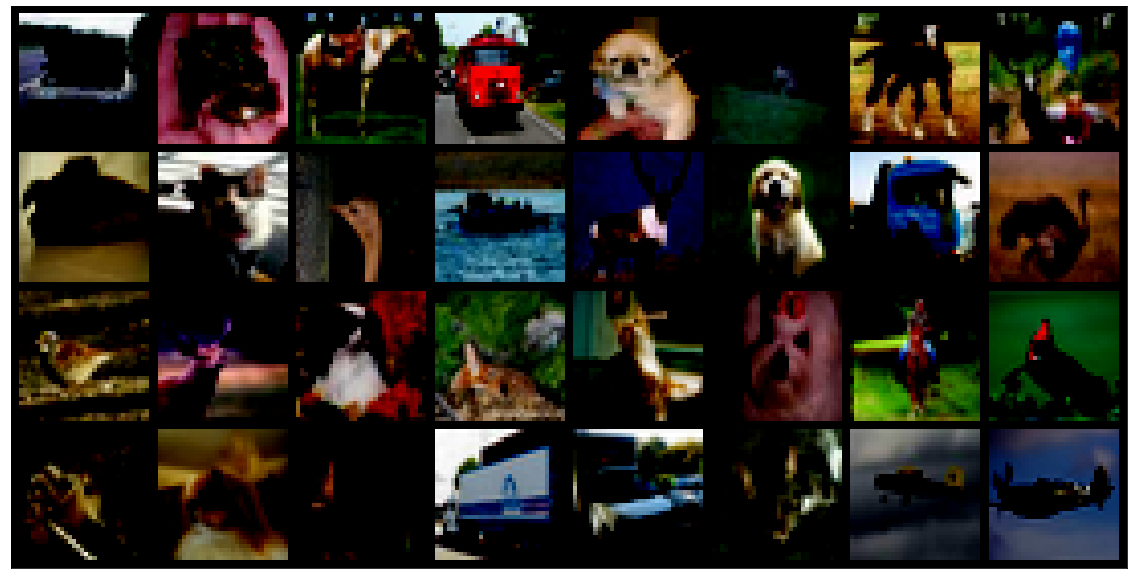

In [21]:
from torchvision.utils import make_grid 
import torchvision.transforms.functional as funct 
def show_grid(imgs, labels): 
  fix, axs = plt.subplots(ncols=len(imgs), squeeze=False, figsize=( 30, 40))
  for i, img in enumerate(imgs): 
    axs[0,i].imshow(np.asarray(img))

dataiter=iter(training_loader) 
images, labels = dataiter.next() 
grid = make_grid(images) 
grid = grid.numpy() 
plt.figure(figsize=(20, 40))
plt.imshow(np.transpose(grid, (1,2,0))) 
plt.xticks(ticks=[],labels=[])
plt.yticks(ticks=[],labels=[])

In [31]:
x=images
type(x)

numpy.ndarray

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

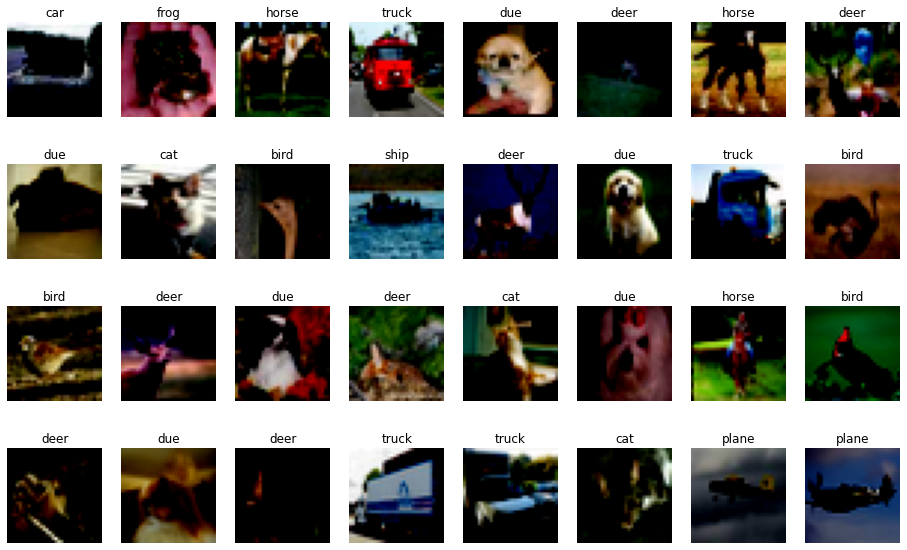

In [33]:
plt.figure(figsize=(16,10))
for i in range(len(images)):
  ax=plt.subplot(4,8,i+1)
  plt.imshow(np.transpose(images[i],(1,2,0)))
  plt.title(classes[labels[i]])
  plt.axis('off')

In [35]:
class ConvNet(nn.Module):
  def __init__(self):
    super(convNet,self).__init__()
    self.layer1=nn.Sequential(
        nn.Conv2d(3,64,kernel_size=5,stride=1,padding=2),
        nn.Relu(),
        nn.MaxPool2d(kernel_size=2,stride=2))
    self.layer1=nn.Sequential(
        nn.Conv2d(64,128,kernel_size=5,stride=1,padding=2),
        nn.Relu(),
        nn.MaxPool2d(kernel_size=2,stride=2))
    self.drop_out=nn.Dropout()
    self.fc1=nn.Linear(8*8*128,1000)
    self.fc2=nn.Linear(1000,10)
  def forward(self,x):
    out=self.layer1(x)
    out=self.layer2(out)
    out=out.reshape(out.size(0),-1)
    out=self.drop_out(out)
    out=self.fc1(out)
    out=self.fc2(out)
    return out

In [36]:
from torchvision import models
model_resnet=models.resnet18(pretrained=True)
last_fc_input_dims=model_resnet.fc.in_features
model_resnet.fc=nn.Linear(last_fc_input_dims,len(classes))
model_resnet=model_resnet.to(device)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [37]:
model=model_resnet
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [38]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [41]:
from IPython.display import clear_output
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi']=100

In [61]:
def visualize_progress(epoch, training_loss_history, training_corrects_history, testing_loss_history, testing_corrects_history): 
  training_loss_history = np.array(training_loss_history) 
  testing_loss_history = np.array(testing_loss_history) 
  training_corrects_history = np.array(training_corrects_history) 
  testing_corrects_history = np.array(testing_corrects_history) 
  clear_output() 
  N=np.arange(0, len(training_loss_history)) 
  plt.style.use("seaborn")  
  fig, ax = plt.subplots(1, 2, figsize=(12, 4)) 
  ax[0].plot(N,training_loss_history,label="Training",c='r')
  ax[0].plot(N,testing_loss_history,label="Testing",c='b')
  ax[0]=set_title("loss evaluated including epoch {}".format(epoch))
  ax[1].plot(N,training_corrects_history,label="Training",c='r')
  ax[1].plot(N,testing_corrects_history,label="Testing",c='b')
  ax[1]=set_title("Accuracy evaluated including epoch {}".format(epoch))
  ax[0].set_xlabel("Epoch #")
  ax[1].set_xlabel("Epoch #")
  ax[0].set_ylabel("Loss")
  ax[1].set_ylabel("Accuracy")
  ax[0].legend()
  ax[1].legend()
  plt.show()

In [49]:
epochs=10
training_loss_history=[]
training_correct_history=[]
test_loss_history=[]
testing_corrects_history=[]

ValueError: ignored

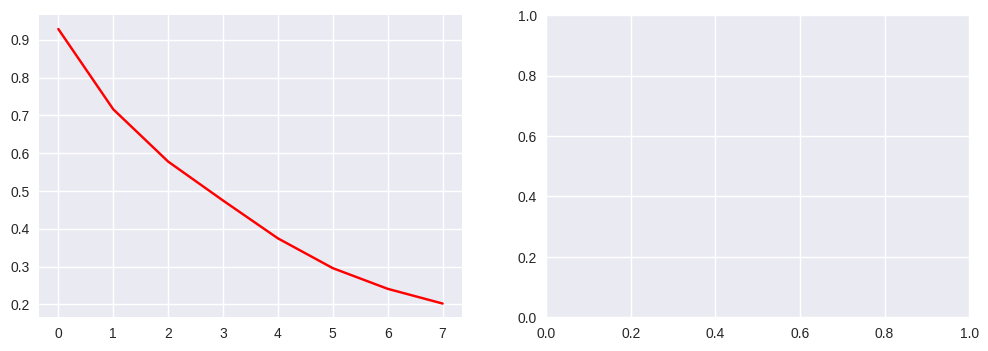

In [62]:
for e in range(epochs):
  print('epoch:',(e+1))
  training_loss=0.0
  training_correct=0.0
  testing_loss=0.0
  testing_correct=0.0
  for inputs,labels in training_loader:
    inputs=inputs.to(device)
    labels=labels.to(device)
    outputs=model(inputs)
    loss=criterion(outputs,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    _ , preds=torch.max(outputs,1)
    training_loss += loss.item()
    training_correct +=torch.sum(preds==labels.data)

  epoch_loss=training_loss/len(training_loader)
  epoch_acc=training_correct.float()/len(training_loader)
  training_loss_history.append(epoch_loss)
  training_correct_history.append(epoch_acc)
  print('training loss:{:.4f},acc{:.4f}'.format(epoch_loss,epoch_acc.item()))
  with torch.no_grad():
    for test_inputs,test_labels in testing_loader:
      test_inputs=test_inputs.to(device)
      test_labels=test_labels.to(device)
      test_outputs=model(test_inputs)
      test_loss=criterion(test_outputs,test_labels)
      _ , test_preds=torch.max(test_outputs,1)
      testing_loss += test_loss.item()
      testing_correct += torch.sum(test_preds==test_labels.data)

  test_epoch_loss=testing_loss/len(testing_loader)
  test_epoch_acc=testing_correct.float()/len(testing_loader)
  test_loss_history.append(test_epoch_loss)
  testing_corrects_history.append(test_epoch_acc)
  print('training loss:{:.4f},acc{:.4f}'.format(test_epoch_loss,test_epoch_acc.item()))
  visualize_progress(e,training_loss_history,training_correct_history,test_loss_history,testing_corrects_history)



In [63]:
MODEL_STORE_PATH = '../output/'
torch.save(model.state_dict(),MODEL_STORE_PATH + 'conv_net_model.ckpt')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

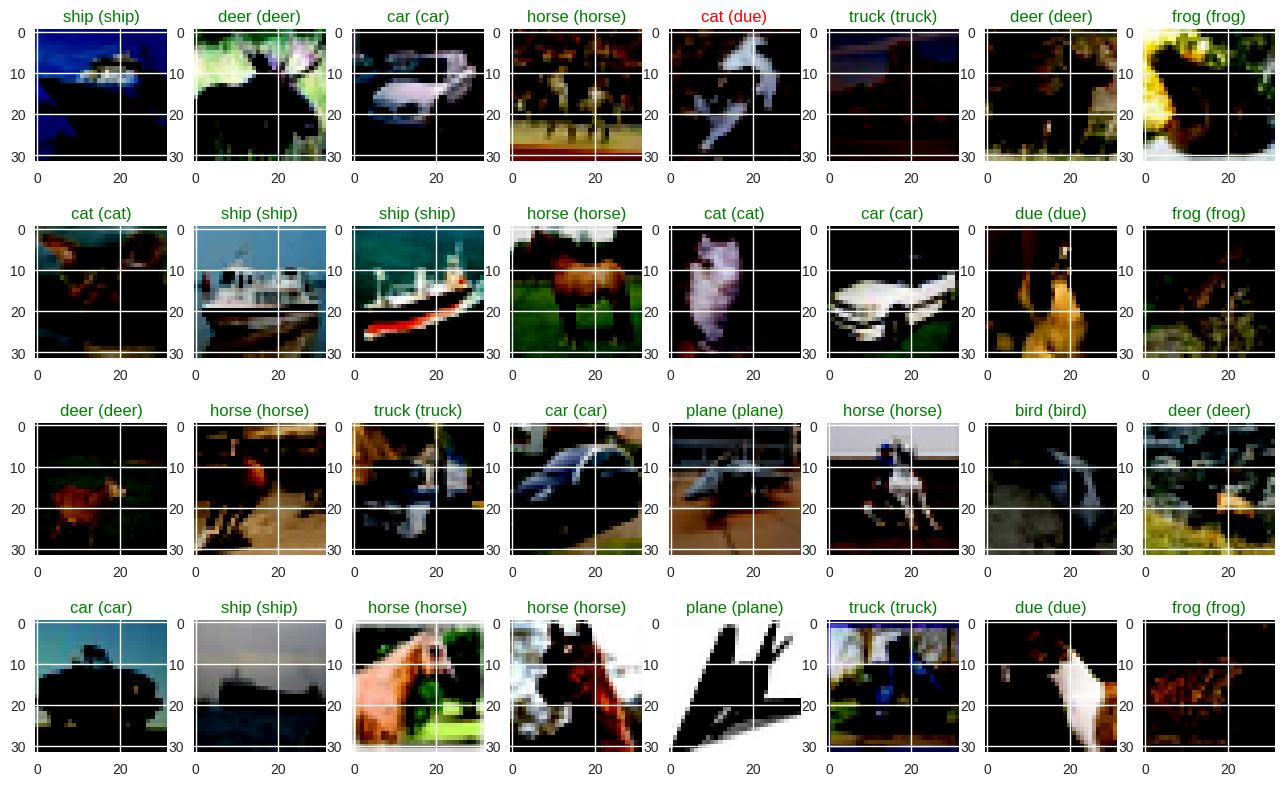

In [64]:
daiter=iter(testing_loader)
images,labels = dataiter.next()
images_gpu = images.to(device)
labels_gpu = labels.to(device)
output=model(images_gpu)
_ , preds = torch.max(output,1)

plt.figure(figsize=(16,10))
for i in range (len(images)):
  ax=plt.subplot(4,8,i+1)
  plt.imshow(np.transpose(images[i],(1,2,0)))
  ax.set_title("{} ({})".format(str(classes[preds[i].item()]),str(classes[labels[i].item()])),color=("green" if preds[i]==labels[i] else "red"))